In [1]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_excel('BITCOIN.xls')
df1 = pd.read_excel('disturb.xls')
bit = df['Value']

import random


for i in range(len(bit)):
    if random.randint(1,1001)//100==0:
        bit[i]+=random.randint(-(bit[i]*0.1//1),bit[i]*0.1//1)

df1['disturb'] = bit 
df1.to_excel('disturb.xls',index = False)

In [3]:
new_data = df1
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)
dataset = new_data.values
train = dataset[0:1450,:] 
valid = dataset[1450:,:]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [4]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, 
 input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

1390/1390 - 51s - loss: 3.0966e-04 - 51s/epoch - 37ms/step


In [5]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

In [6]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rc('font', size=12)
train = new_data[:1450]
valid = new_data[1450:]
valid['Predictions'] = closing_price

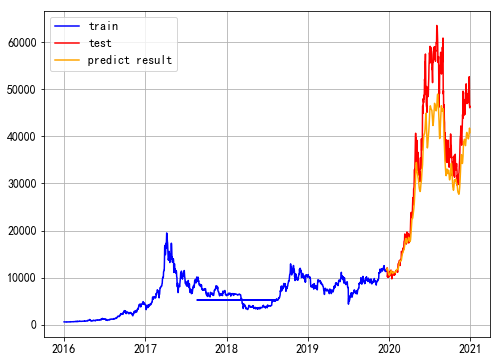

In [7]:
plt.figure(figsize=(8,6))
# plt.title("predict_BITCOIN",fontsize=20)
# plt.title("predict GOLD",fontsize=20)
plt.plot(train['disturb'],color="blue",label="train")# for GOLD, exchange value to USD
plt.plot(valid['disturb'],color="red",label="test")# for GOLD, exchange value to USD
plt.plot(valid['Predictions'],color="orange",label="predict result")
plt.grid()
times = range(0, len(new_data), 365)
plt.xticks(times, ['2016','2017','2018','2019','2020','2021'])
plt.legend()

plt.savefig("predict_disturb.png")
plt.show()